#**Deep Learning Homework 3: Convolutional Neural Networks**

### MSc Computer Science, Data Science, Cybersecurity @UniPD
### 2nd semester - 6 ECTS
### Prof. Nicolò Navarin & Prof. Alessandro Sperduti
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [ ]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 3s 0us/step


Let's take a look at a sample of the images in the dataset:

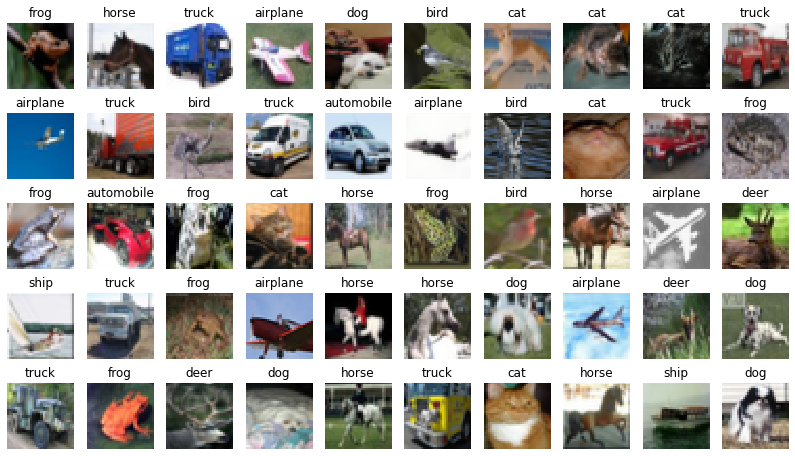

In [ ]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [ ]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

train_mean=np.mean(X_train,axis=0)
train_std=np.std(X_train,axis=0)
X_train = (X_train-train_mean)/train_std
X_valid = (X_valid-train_mean)/train_std
X_test = (X_test-train_mean)/train_std


#Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 32s 88ms/step - loss: 1.4507 - accuracy: 0.4930 - val_loss: 1.2340 - val_accuracy: 0.5736
Epoch 2/10
352/352 [==============================] - 32s 90ms/step - loss: 1.1448 - accuracy: 0.6055 - val_loss: 1.0973 - val_accuracy: 0.6224
Epoch 3/10
352/352 [==============================] - 30s 86ms/step - loss: 1.0246 - accuracy: 0.6454 - val_loss: 1.0908 - val_accuracy: 0.6248
Epoch 4/10
352/352 [==============================] - 30s 85ms/step - loss: 0.9502 - accuracy: 0.6751 - val_loss: 1.0412 - val_accuracy: 0.6354
Epoch 5/10
352/352 [==============================] - 30s 85ms/step - loss: 0.8932 - accuracy: 0.6949 - val_loss: 1.0270 - val_accuracy: 0.6434
Epoch 6/10
352/352 [==============================] - 30s 85ms/step - loss: 0.8541 - accuracy: 0.7079 - val_loss: 1.0157 - val_accuracy: 0.6508
Epoch 7/10
352/352 [==============================] - 30s 86ms/step - loss: 0.8235 - accuracy: 0.7185 - val_loss: 0.9948 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 3s - loss: 1.0311 - accuracy: 0.6598 - 3s/epoch - 8ms/step
accuracy: 65.98%


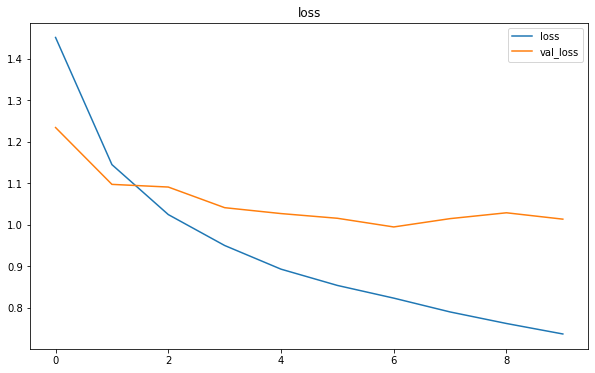

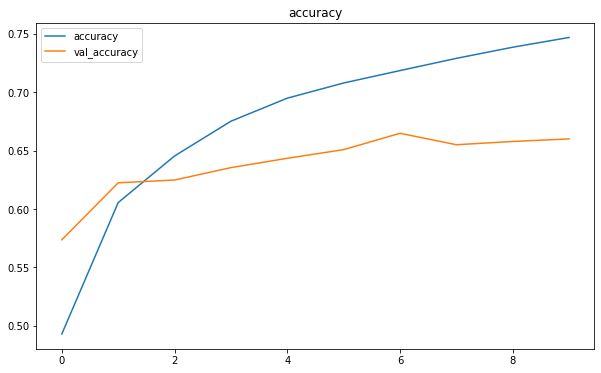

In [ ]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

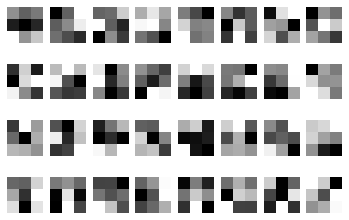

In [ ]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.



<h6><mark><b> Answer to question 1:</b></mark></h6>

* In a Conv2D layer, the parameters are the wights in the filter and one bias value, 
for example for the `first Conv2D` we have:


  $n_h = 3$, $n_w = 3$ and $n_c = 3$ which are height of filter, width of the filter and number of filters used in the convolution ( $n_c$ it is equal to 3 since the `RGB image has 3 channel)`
##### so we have `3x3x3` for each filters and one bias for all weights. Since we have 32 filters:
  `( 3x3x3 + 1 ) x 32 = 896`
  - for example for the `Second Conv2D` we have:

    $n_h = 2$, $n_w = 2$ and $n_c = 16$ which are height of filter, width of the filter and number of filters used in the convolution ( $n_c$ it is equal to 32 since the `output of the recent Conc2D has 32 channel)`
##### so we have `2x2x32` for each filters and one bias for all weights. Since we have 32 filters:
    `( 2x2x32 + 1 ) x 16 = 2064`
<h6><mark><b> Answer to question 2:</b></mark></h6>

* Two sequential `Conv2D` have different number of parameters, since they have different number of size and channel based on the input data

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 33s 91ms/step - loss: 1.6073 - accuracy: 0.4249 - val_loss: 1.3456 - val_accuracy: 0.5258
Epoch 2/10
352/352 [==============================] - 32s 91ms/step - loss: 1.2719 - accuracy: 0.5551 - val_loss: 1.2120 - val_accuracy: 0.5806
Epoch 3/10
352/352 [==============================] - 32s 91ms/step - loss: 1.1544 - accuracy: 0.5976 - val_loss: 1.1153 - val_accuracy: 0.6128
Epoch 4/10
352/352 [==============================] - 32s 92ms/step - loss: 1.0867 - accuracy: 0.6235 - val_loss: 1.0767 - val_accuracy: 0.6242
Epoch 5/10
352/352 [==============================] - 32s 91ms/step - loss: 1.0413 - accuracy: 0.6388 - val_loss: 1.0436 - val_accuracy: 0.6364
Epoch 6/10
352/352 [==============================] - 32s 91ms/step - loss: 1.0074 - accuracy: 0.6522 - val_loss: 1.0439 - val_accuracy: 0.6352
Epoch 7/10
352/352 [==============================] - 32s 91ms/step - loss: 0.9822 - accuracy: 0.6600 - val_loss: 1.0139 - val_accuracy:

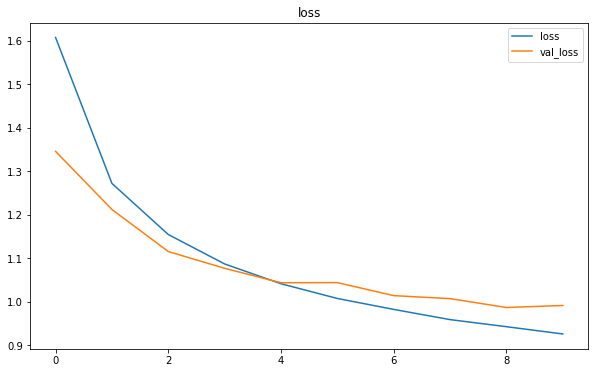

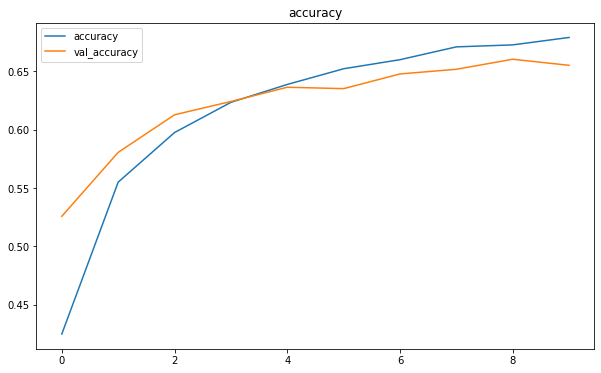

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

<!DOCTYPE html>
<html>
<head>
<style>
table, th, td {
  border: 1px solid black;
}
</style>
</head>
<body>

<h2><mark><b>Experiments<h2><mark><b>

<p>The different experiments has been listed below:</p>

<table style="width:100%">
  <tr>
    <th>Number</th>
    <th>Experiments</th>
    <th>Changes</th>
    <th>Test Accuracy</th>

  </tr>
  <tr>
    <th>0</th>
    <td>Last result</td>
    <td></td>
    <td>65.91%</td>

  </tr>
  <tr>
    <th>1</th>
    <td>Increasing the number of layer by one</td>
    <td>One Conv2d with max-pool has been added to the structures.</td>
    <td>62.73%</td>

  </tr>
  <tr>
    <th>2</th>
    <td>Increasing the Number of filters of Conv2D</td>
    <td>The number of filters in each layer has been doubled.</td>
    <td>69.16%</td>

  </tr>
  <tr>
    <th>3</th>
    <td>Changing Activation functions of layers</td>
    <td>The activation function has been changed to "tanh".</td>
    <td>65.79%</td>

  </tr>
  <tr>
    <th>4</th>
    <td>Changing the epoch size</td>
    <td>The epoch has been increased from 10 to 15</td>
    <td>66.84%</td>

  </tr>
  <tr>
    <th>5</th>
    <td>Increasing the batch size</td>
    <td>The batch size has been doubled</td>
    <td>64.24%</td>

  </tr>
  <tr>
    <th>6</th>
    <td>Changing the Optimizer</td>
    <td>The optimizer has been changed to "RMSProp"</td>
    <td>66.09%</td>

  </tr>
  <tr>
    <th>7</th>
    <td>Changing the max-pool size</td>
    <td>The max-pool size has been changed from (2,2) to (3,3)</td>
    <td>62.01%</td>


  </tr>
    <tr>
    <th>8</th>
    <td>decreasing the batch size</td>
    <td>The batch size has been half of pervious batch size.</td>
    <td>66.34%</td>


  </tr>

</table>

</body>
</html>



<h6><mark><b>Second: Increasing the Number of filters of Conv2D<h6><mark><b>

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 10)               

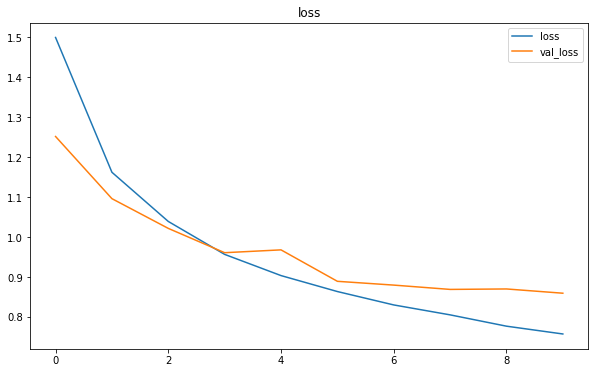

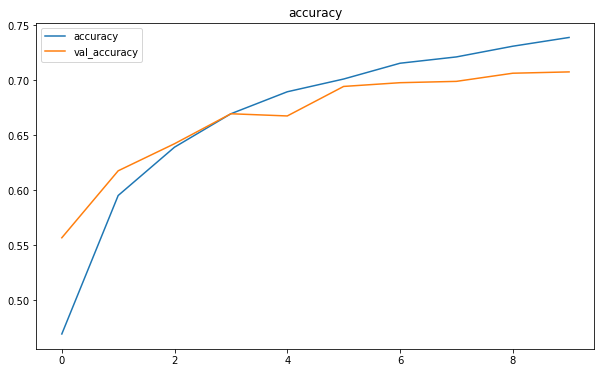

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model2.summary())
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history2)
plot_accuracy(history2)

scores = model2.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model2.metrics_names[1], scores[1]*100))
print("----------------------------")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


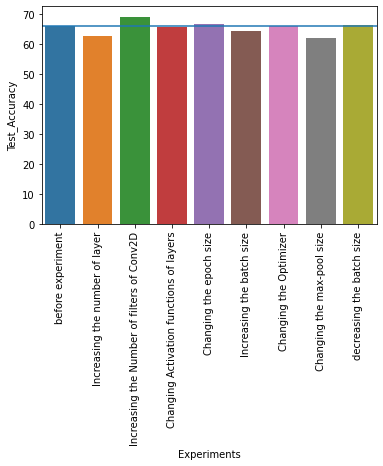

In [ ]:
import pandas as pd
import seaborn as sns
s = [ ("before experiment",65.91),("Increasing the number of layer",62.73),("Increasing the Number of filters of Conv2D",69.16),
     ("Changing Activation functions of layers",65.79)
     ,("Changing the epoch size",66.84),("Increasing the batch size",64.24),("Changing the Optimizer",66.09),(" Changing the max-pool size",62.01),
     ("decreasing the batch size",66.34)]
score = pd.DataFrame(data=s,columns=["Experiments","Test_Accuracy"])
g= sns.barplot(score.Experiments,score.Test_Accuracy)
plt.xticks(rotation=90)
g.axhline(65.91)


### [TO COMPLETE] Example of tests discussion
<b>The best model that I found was model that number of filters for each layer has been increased.
The achieved accuracy in the test set is <mark>69.16</mark> whcih is higher than last CNN network of recent part.</b>

<mark><b> Discussion :</mark></b>
Increasing the number of filtres has more complexity to model and adds mor burden to solve the problem but its improve the accuracy of model on the test set. More filters have more chance to get more detail about the data and its probable to have better performance on a unseen sample.

Besides, I tested also other models: 
* With more number of layers
* With more number of filters for each layer
* Have a different activation function
* With different epoch size
* With different batch size
* Have a different optimizer
* different max-pool size


<b><mark>Discussion:</mark></b>
<ol>
<li> The neetwork with more number of layers has worser performance. It maybe because of vanishing the effect of input when the number of layers increases. </li>
<li>Increasing the number of filters in each layer, improve the performance of the network on test data. A model with more filters has this opportunity to capture more detail of pictures and has more accurate model. </li>
<li>As we know, there is not huge difference between <b><mark>relu</mark></b> and <b><mark>tanh</mark></b> function and because of that the performance doesnt have too much difference. </li>
<li>Increasing the number of epoch showed the model had a better performance. The network trained more on the training data and its performance became better at the end when we evaluate the perfomance on the test data.</li>
<li>Increasing the number of batch size not only did not have any positive impact on the performance but also the accuracy of the network on test data decresed. </li>
<li>Changing the optimizer from <b><mark>adam</b></mark> to <b><mark>RMSProp</b></mark> had a little improvement on the test data.</li>
<li>Incresing the size of max-pool did not have any positive impact on the performance of network.</li>
<li>In this experiment, ,unlike the 5th experiment, decreasing the the batch size had a positive impact on performance of the model on test data </li>
</ol>